### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problems

Use the prompts below to get started with your data analysis.  

**1. Read in the `coupons.csv` file.**




In [3429]:
#Reading the csv file
data = pd.read_csv('data/coupons.csv')

In [3431]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**

In [3434]:
#analyzing the data for column names, datatypes, null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [3436]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**3. Decide what to do about your missing data -- drop, replace, other...**

## Data Cleaning

1. Duplicates are dropped
2. Car Column is dropped due to insufficient data
3. Missing values of Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50 are filled


<h4>Handling Duplicates</h4>
<BR>

**Dropping Duplicates** 
Using the duplicated method to find and drop duplicates, retaining the first occurance.<BR>
<BR>



In [3442]:
data.duplicated(keep=False).sum()

148

In [3444]:
data_dedupe = data.drop_duplicates(keep='first')

In [3446]:
data_dedupe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

<h4>Handling the missing values:</h4>
    We see missing values in car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50 columns. 

**i. Dropping Car Column** 

This column has categorical value. There are only 108 values in the 'car' column(i.e. ~1% of the records seems to have values.)<br>
So I have decided to drop the column.

In [3452]:
data_cleaned = data_dedupe.drop('car',axis=1)

**ii. Handling nan Values in Bar Column**

In [3459]:
data_cleaned['Bar'].value_counts()

Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64


107 records have nan value for Bar column. It contributes to 0.8% of the total records. We see 41% of the available records have 'never' as the value i.e. Mode of the column. So filling the nan rows by the mode of the column. 

In [3462]:
data_cleaned['Bar'] = data_cleaned['Bar'].fillna( 'never')

**iii. Handling nan Values in CoffeeHouse Column**

In [3464]:
data_cleaned['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64

In [3466]:
data_cleaned['CoffeeHouse'] = data_cleaned['CoffeeHouse'].fillna('less1')

**iv. Handling nan Values in CarryAway Column**

In [3469]:
data_cleaned['CarryAway'].value_counts()

CarryAway
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64

In [3471]:
data_cleaned['CarryAway'] = data_cleaned['CarryAway'].fillna('1~3')

**v. Handling nan Values in RestaurantLessThan20 Column**

In [3474]:
data_cleaned['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64

In [3476]:
data_cleaned['RestaurantLessThan20'] = data_cleaned['RestaurantLessThan20'].fillna('1~3')

**vi. Handling nan Values in Restaurant20To50 Column**

In [3479]:
data_cleaned['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64

In [3481]:
data_cleaned['Restaurant20To50'] = data_cleaned['Restaurant20To50'].fillna('less1')

In [3483]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

<br>
<br>
Now all the nan values in the data are filledin. The data is clean to perform the analysis.
<br>
<br>

4. What proportion of the total observations chose to accept the coupon?


**Proportion of Total Observation Chose to Accept The Coupon**

In [3488]:
data_cleaned['Y'].value_counts().sort_index()

Y
0    5453
1    7157
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accepted and Rejected Coupons')

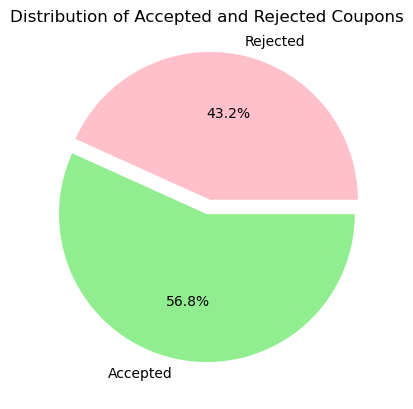

In [3490]:
plt.pie(data_cleaned['Y'].value_counts().sort_index(), autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'])
plt.title("Distribution of Accepted and Rejected Coupons")


In the above pie chart, we see, 56.8% of the total coupons issued are accepted. 
<BR>

5. Use a bar plot to visualize the `coupon` column.

**Visualizing Coupon Columns**

In [3495]:
coupons_count = pd.DataFrame(data_cleaned['coupon'].value_counts())
coupons_count.reset_index()

,coupon,count
0,Coffee House,3989
1,Restaurant(<20),2779
2,Carry out & Take away,2344
3,Bar,2010
4,Restaurant(20-50),1488


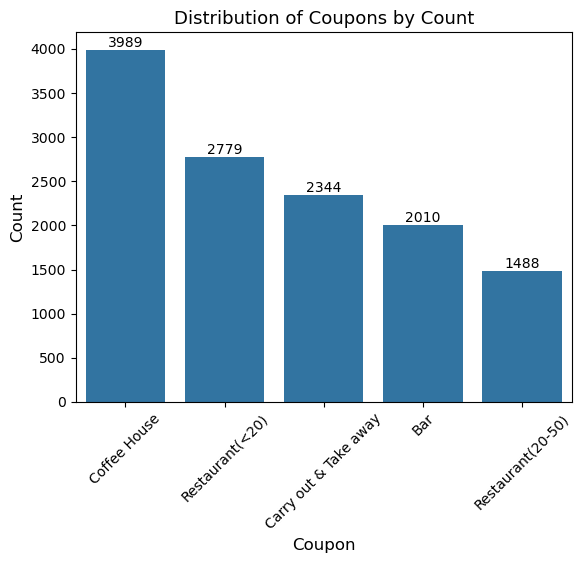

In [3497]:
ax = sns.barplot(data=coupons_count, x='coupon',y='count')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Distribution of Coupons by Count', fontsize=13)
plt.xlabel('Coupon', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In the bar plot, we see **Coffee House** coupons are the most issued, while **Restaurant(20-50)** coupons are the least issued to the people.
<BR>
<BR>

6. Use a histogram to visualize the temperature column.

**Visualizing Temperature Distribution**

In [3502]:
temperature_data = data_cleaned['temperature']

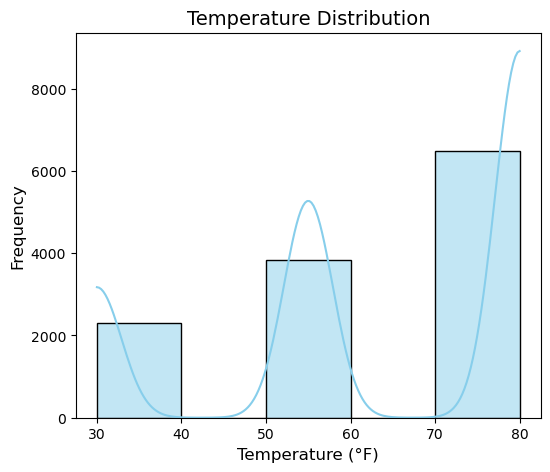

In [3504]:
plt.figure(figsize=(6, 5))  
sns.histplot(temperature_data, bins=5, kde=True, color='skyblue')
plt.title('Temperature Distribution', fontsize=14)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Coupon Acceptance Distribution by Destination**

Analysing how much has the destination of the place influenced the decision.

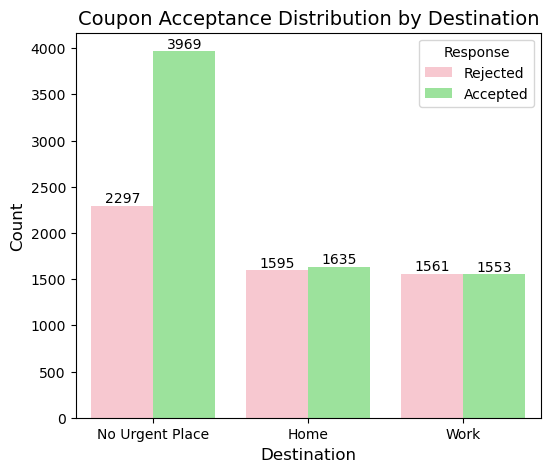

In [3507]:
plt.figure(figsize=(6, 5)) 
ax = sns.countplot(data=data_cleaned, x = 'destination' , hue='Y', palette=['pink','lightgreen'])
for i in ax.containers:
    ax.bar_label(i,)

ax.legend(title="Response", labels=['Rejected','Accepted'], loc='upper right')
plt.title('Coupon Acceptance Distribution by Destination', fontsize=14)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The above shown count plot describes that, the likelyhood of people accepting the coupon is more when they have no urgent work. 
While, there is only 50% probability that people will consider accepting the coupon, when they are heading to work/home

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [3512]:
bar_coupons_data = data_cleaned[data_cleaned['coupon'] == 'Bar']

**2. What proportion of bar coupons were accepted?**


**Bar Coupon Acceptance**

In [3516]:
bar_coupons_acceptance = bar_coupons_data['Y'].value_counts().sort_index()
bar_coupons_acceptance

Y
0    1186
1     824
Name: count, dtype: int64

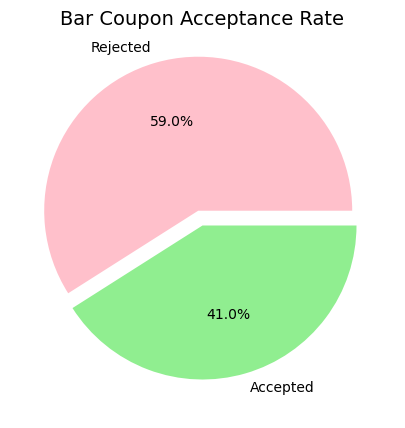

In [3518]:
plt.figure(figsize=(6, 5))  
plt.pie(bar_coupons_acceptance, autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'])
plt.title('Bar Coupon Acceptance Rate', fontsize=14)
plt.show()

The pie chart indicates that Bar Coupons are not widely preferred, with an acceptance probability of approximately 40%. Because in most of the other cases the coupon acceptance rates are greater than rejection rates.

**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [3526]:
visiting_more_than_thrice = bar_coupons_data['Bar'].isin(['gt8', '4~8'])
visiting_less_than_thrice = bar_coupons_data['Bar'].isin(['less1', '1~3'])

In [3528]:
bar_visitors = bar_coupons_data[~(bar_coupons_data['Bar']=='never')]

In [3530]:
def checkFrequency(row):
    if(row['Bar'] in ['less1', '1~3']):
        return 'Not Frequent'
    elif(row['Bar'] in ['gt8', '4~8']):
        return 'Frequent'

In [3532]:
bar_visitors['FrequentBarVisitor'] =  bar_coupons_data.apply(checkFrequency, axis=1)

/var/folders/8q/zlmc9fyd4y91m0rrnqrm87hh0000gn/T/ipykernel_76527/3413807908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_visitors['FrequentBarVisitor'] =  bar_coupons_data.apply(checkFrequency, axis=1)


In [3534]:
coupon_acceptance_based_on_behavior = pd.DataFrame(bar_visitors.groupby(['FrequentBarVisitor','Y']).size())
coupon_acceptance_based_on_behavior.rename(columns={0:'Count'},inplace=True)
coupon_acceptance_based_on_behavior= coupon_acceptance_based_on_behavior.reset_index()
coupon_acceptance_based_on_behavior

,FrequentBarVisitor,Y,Count
0,Frequent,0,46
1,Frequent,1,153
2,Not Frequent,0,453
3,Not Frequent,1,507


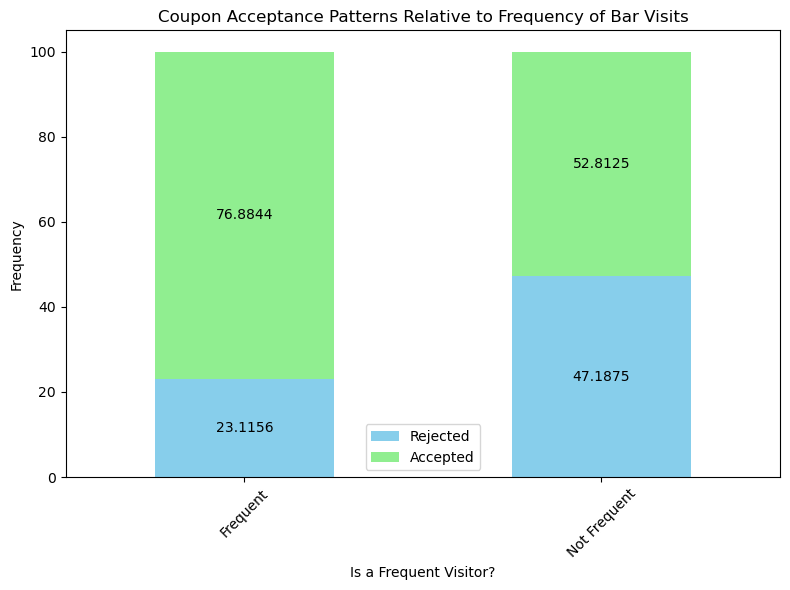

In [3538]:
pivot_data = coupon_acceptance_based_on_behavior.pivot(index='FrequentBarVisitor', columns='Y', values='Count')

# Normalize the data to represent percentages
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

custom_colors = ['skyblue', 'lightgreen']
ax = percentage_data.plot(kind='bar', stacked=True, color=custom_colors[:len(pivot_data.columns)], figsize=(8, 6))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Customize plot
plt.xticks(rotation=45)
plt.xlabel('Is a Frequent Visitor?')
plt.ylabel('Frequency')
plt.title('Coupon Acceptance Patterns Relative to Frequency of Bar Visits')
plt.legend(labels=['Rejected', 'Accepted'])
plt.tight_layout()

plt.show()

<BR>
The stacked bar plot reveals that there is a 50% likelihood of a less frequent visitor accepting a bar coupon, while the probability increases to 75% for frequent visitors.
<br>

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [3542]:
visiting_more_than_once = bar_coupons_data['Bar'].isin(['1~3', 'gt8', '4~8'])

In [3544]:
age_over_25 = bar_coupons_data['age'].isin(['46', '26', '31', '41', '50plus', '36'])

In [3546]:
frequent_visitor_over_25 = (visiting_more_than_once & age_over_25) 

In [3548]:
not_a_visitor = bar_coupons_data['Bar'].isin(['never', 'less1'])

In [3550]:
age_below_25 = bar_coupons_data['age'].isin(['21','below21'])

In [3552]:
not_frequent_below_25 = (not_a_visitor & age_below_25 )

In [3553]:
frequent_below_25 = (~not_a_visitor & age_below_25 )

In [3556]:
bar_coupons_data[frequent_below_25]['Y'].value_counts().sort_index()

Y
0     58
1    118
Name: count, dtype: int64

In [3558]:
bar_coupons_data[frequent_visitor_over_25]['Y'].value_counts().sort_index()

Y
0    128
1    292
Name: count, dtype: int64

In [3560]:
bar_coupons_data[not_frequent_below_25]['Y'].value_counts().sort_index()

Y
0    199
1    129
Name: count, dtype: int64

Text(0.5, 1.0, 'Non-Visitors Below 25')

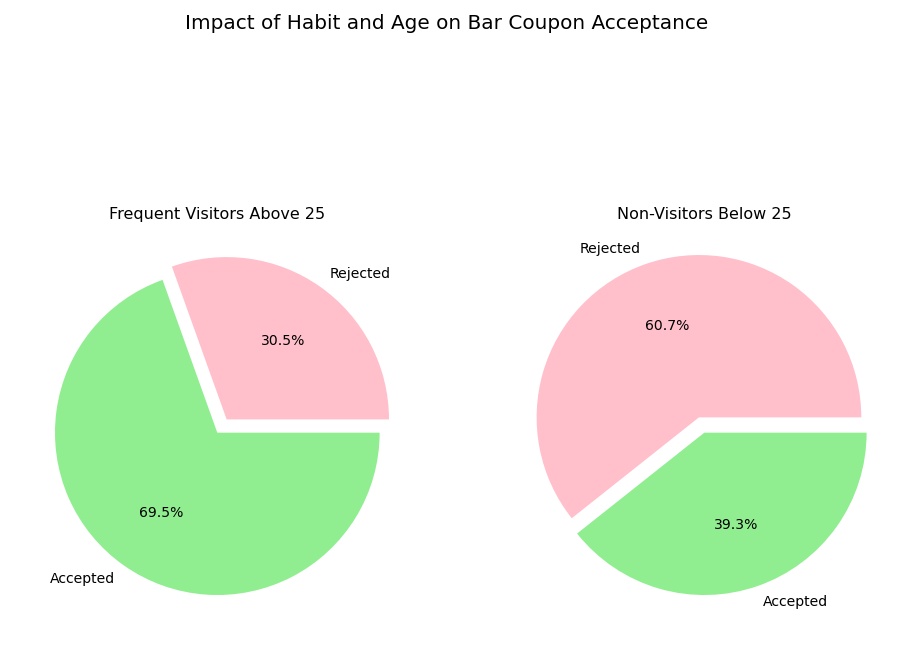

In [3562]:
fig = plt.figure(figsize=(8,6),dpi=144)
fig.suptitle('Impact of Habit and Age on Bar Coupon Acceptance', fontsize=10)

ax1 = fig.add_subplot(121)
ax1.set_title('Frequent Visitors Above 25', fontsize=8)
ax1.pie(bar_coupons_data[frequent_visitor_over_25]['Y'].value_counts().sort_index(), autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'],textprops={'fontsize':7})
ax2 = fig.add_subplot(122)
ax2.pie(bar_coupons_data[not_frequent_below_25]['Y'].value_counts().sort_index(), autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'],textprops={'fontsize':7})
ax2.set_title('Non-Visitors Below 25',fontsize=8)

The comparison shows that both habit and age play a significant role in the decision to accept a coupon. Individuals under 25, who are non-visitors tend to reject the coupons, while those over 25 are more likely to accept them.

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


**Analysing Based on Age, Occupation & Habit**

In [3567]:
visiting_more_than_once = bar_coupons_data['Bar'].isin(['1~3', 'gt8', '4~8'])

In [3569]:
no_kids_passengar = bar_coupons_data['passanger'].isin(['Friend(s)', 'Alone', 'Partner'])

In [3571]:
occ_not_farming_fishing = ~bar_coupons_data['occupation'].isin(['farming, fishing, or forestry'])

In [3573]:
combinig = (visiting_more_than_once & no_kids_passengar & occ_not_farming_fishing)

In [3575]:
bar_coupons_data[combinig]['Y'].value_counts().sort_index()

Y
0    158
1    393
Name: count, dtype: int64

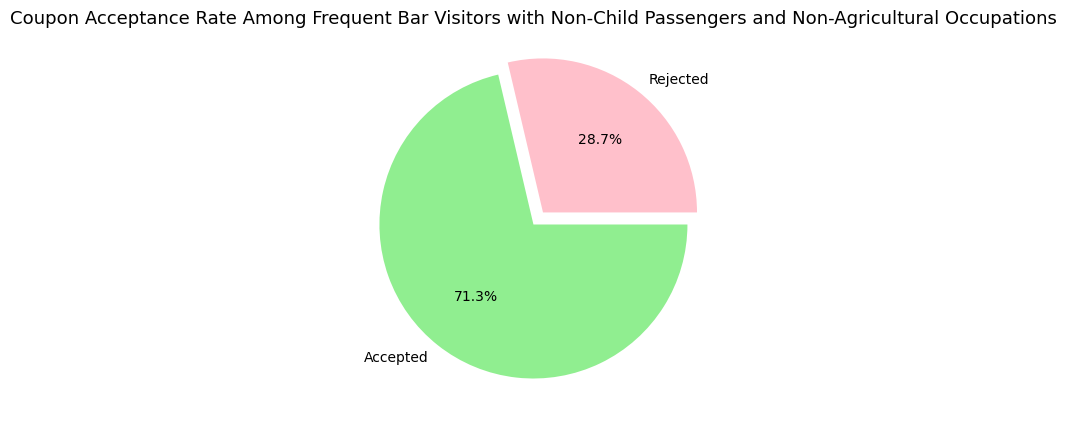

In [3577]:
plt.figure(figsize=(6, 5))  
plt.pie(bar_coupons_data[combinig]['Y'].value_counts().sort_index(), autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'])
plt.title('Coupon Acceptance Rate Among Frequent Bar Visitors with Non-Child Passengers and Non-Agricultural Occupations', fontsize=13)
plt.show()

Individuals who visit bars more than once a month, have non-child passengers, and are employed in fields outside of farming, fishing, or forestry tend to accept the coupons approximately 70% of the time.

**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



**Analysis Based on Habit, Passenger, Age & Income**

In [3583]:
drivers_not_widowed = ~(bar_coupons_data['maritalStatus'] == 'Widowed')

In [3585]:
freq_visitor_no_kids_not_widow = (visiting_more_than_once & no_kids_passengar & drivers_not_widowed )

In [3587]:
summary = pd.DataFrame(bar_coupons_data[freq_visitor_no_kids_not_widow].groupby('Y').size()).sort_index()

In [3589]:
summary['status'] = ['Rejected', 'Accepted']
summary = summary.reset_index()
summary.rename(columns={0:'Count'},inplace=True)

In [3591]:
summary

,Y,Count,status
0,0,158,Rejected
1,1,393,Accepted


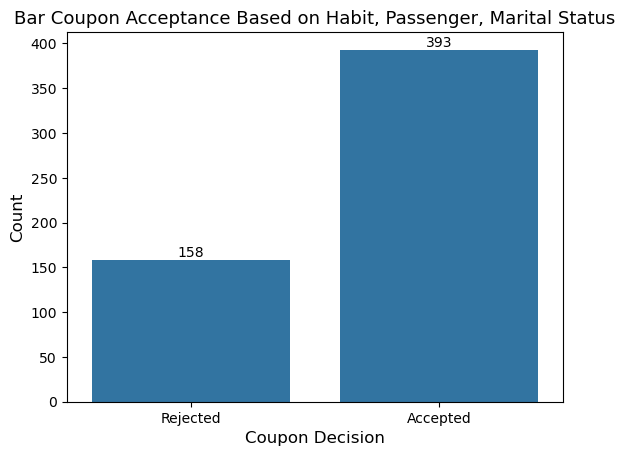

In [3593]:
ax = sns.barplot(data=summary, x='status',y='Count')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Bar Coupon Acceptance Based on Habit, Passenger, Marital Status', fontsize=13)
plt.xlabel('Coupon Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [3596]:
driver_under_30 = bar_coupons_data['age'].isin(['21','26','below21'])

In [3598]:
freq_visitor_under_30 = (visiting_more_than_once & driver_under_30 )

In [3600]:
summary = pd.DataFrame(bar_coupons_data[freq_visitor_under_30].groupby('Y').size()).sort_index()
summary['status'] = ['Rejected', 'Accepted']
summary = summary.reset_index()
summary.rename(columns={0:'Count'},inplace=True)
summary

,Y,Count,status
0,0,96,Rejected
1,1,249,Accepted


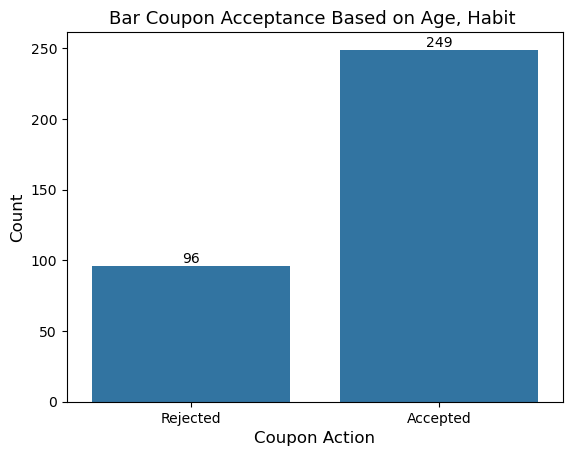

In [3602]:
ax = sns.barplot(data=summary, x='status',y='Count')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Bar Coupon Acceptance Based on Age, Habit ', fontsize=13)
plt.xlabel('Coupon Action', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [3604]:
income_less_than_50k = bar_coupons_data['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])

In [3606]:
freq_cheap_rest_visitor = bar_coupons_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])

In [3608]:
cheap_rest_less_income = (income_less_than_50k & freq_cheap_rest_visitor)

In [3610]:
summary = pd.DataFrame(bar_coupons_data[cheap_rest_less_income].groupby('Y').size()).sort_index()
summary['status'] = ['Rejected', 'Accepted']
summary = summary.reset_index()
summary.rename(columns={0:'Count'},inplace=True)
summary

,Y,Count,status
0,0,188,Rejected
1,1,156,Accepted


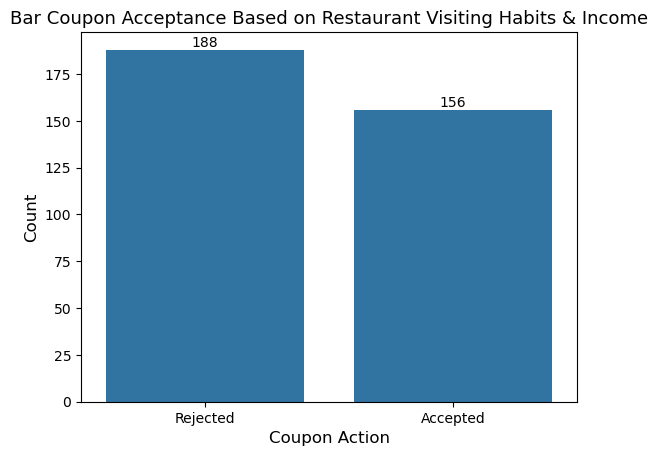

In [3612]:
ax=sns.barplot(data=summary, x='status',y='Count')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Bar Coupon Acceptance Based on Restaurant Visiting Habits & Income', fontsize=13)
plt.xlabel('Coupon Action', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Analyzing the last three bar graphs, we find that individuals who frequently visit economical restaurants and fall within a lower income bracket(~50k Annually) tend to reject bar coupons. In contrast, frequent visitors without child passengers are more likely to accept the coupons most of the time.

In [3615]:
combined_result = freq_visitor_no_kids_not_widow | freq_visitor_under_30 | cheap_rest_less_income

In [3617]:
summary = pd.DataFrame(bar_coupons_data[combined_result].groupby('Y').size()).sort_index()
summary['status'] = ['Rejected', 'Accepted']
summary = summary.reset_index()
summary.rename(columns={0:'Count'},inplace=True)
summary

,Y,Count,status
0,0,319,Rejected
1,1,457,Accepted


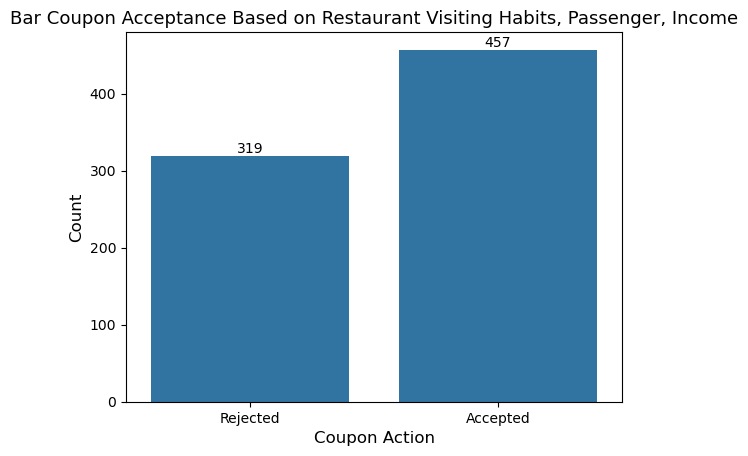

In [3619]:
ax=sns.barplot(data=summary, x='status',y='Count')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Bar Coupon Acceptance Based on Restaurant Visiting Habits, Passenger, Income', fontsize=13)
plt.xlabel('Coupon Action', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The above graph covers various questions asked in qustion 6. Considering all the mentioned conditions, people are more likely to accept the coupons.

**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

<h4>Hypothesis on Bar Coupons Acceptance Rate</h4><br>
    * Only 40% of the bar coupons issued are accepted, while the acceptance rates for other coupons are higher than their respective rejection rates.<br><br>
    * Frequent visitors, defined as those who visit bars more than three times a month, have a higher likelihood of accepting coupons.<br><br>
    * The acceptance rate is 50% for less frequent visitors, but it rises to 77% for frequent visitors.<br>   <br> 
    * People under the age of 25 are less likely to accept bar coupons.<br><br>
    * Individuals with an annual income of less than $50k are more likely to reject bar coupons.<br><br>

## Independent Investigations

<h4>Analyzing Coupon Acceptance Based on Passenger</h4>

In [3630]:
passenger_data = pd.DataFrame(data_cleaned.groupby(['coupon','passanger','Y']).size())
passenger_data.rename(columns={0: 'count'}, inplace=True)
passenger_data = passenger_data.reset_index()
passenger_data = passenger_data[passenger_data['Y']==1]

In [3632]:
coupon_acceptance_by_passenger = pd.DataFrame(passenger_data.groupby('passanger').sum())
coupon_acceptance_by_passenger = coupon_acceptance_by_passenger.reset_index()
coupon_acceptance_by_passenger


,passanger,coupon,Y,count
0,Alone,BarCarry out & Take awayCoffee HouseRestaurant...,5,3801
1,Friend(s),BarCarry out & Take awayCoffee HouseRestaurant...,5,2216
2,Kid(s),BarCarry out & Take awayCoffee HouseRestaurant...,5,505
3,Partner,BarCarry out & Take awayCoffee HouseRestaurant...,5,635


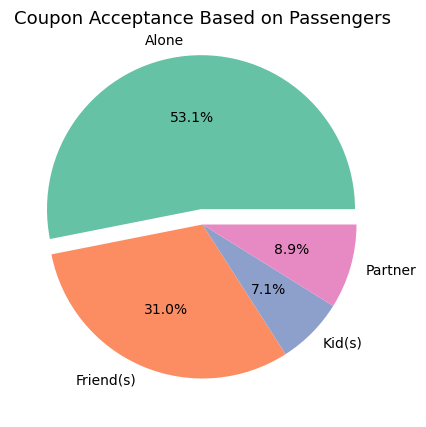

In [3634]:
plt.figure(figsize=(6, 5))  
plt.pie(coupon_acceptance_by_passenger['count'], autopct='%1.1f%%',explode = [0.1,0,0,0], labels= coupon_acceptance_by_passenger['passanger'],colors=sns.color_palette("Set2") )
plt.title('Coupon Acceptance Based on Passengers', fontsize=13)
plt.show()

This pie chart clearly illustrates that over 50% of the accepted coupons are those offered when traveling without co-passengers. In contrast, only 7% of the accepted coupons  are of those travelling with children. To explore this further, the stacked bar graph below shows the percentage of coupons accepted by each passenger category.

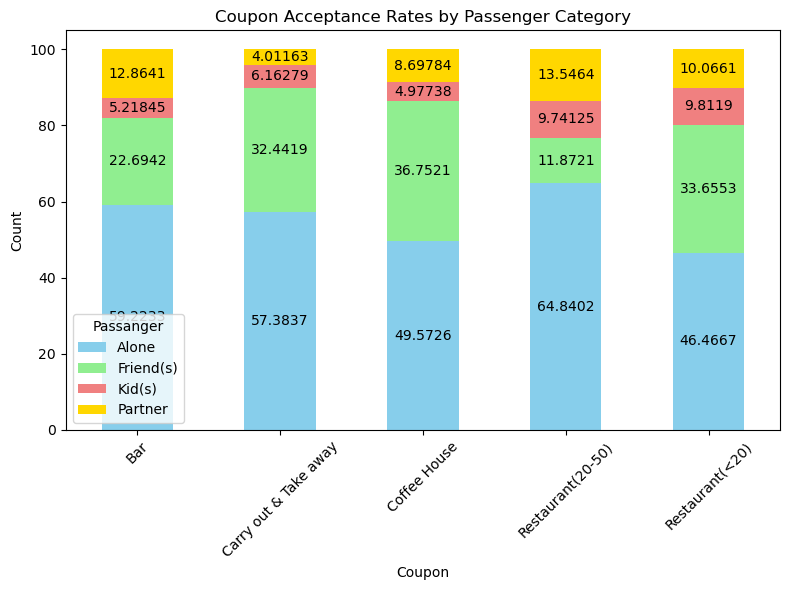

In [3637]:
pivot_data = passenger_data.pivot(index='coupon', columns='passanger', values='count')

# Normalize the data to represent percentages
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']
# Plot a stacked bar chart
ax = percentage_data.plot(kind='bar', stacked=True, color=custom_colors[:len(pivot_data.columns)], figsize=(8, 6))

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Customize plot
plt.xticks(rotation=45)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Acceptance Rates by Passenger Category')
plt.legend(title='Passanger')
plt.tight_layout()

# Show plot
plt.show()

<h3>Analyzing the Coupon Acceptance Rate Across categories</h3>

In [3642]:
coupon_data = pd.DataFrame(data_cleaned.groupby(['coupon','Y']).size())
coupon_data.rename(columns={0: 'count'}, inplace=True)
coupon_data.reset_index()

,coupon,Y,count
0,Bar,0,1186
1,Bar,1,824
2,Carry out & Take away,0,624
3,Carry out & Take away,1,1720
4,Coffee House,0,2000
5,Coffee House,1,1989
6,Restaurant(20-50),0,831
7,Restaurant(20-50),1,657
8,Restaurant(<20),0,812
9,Restaurant(<20),1,1967


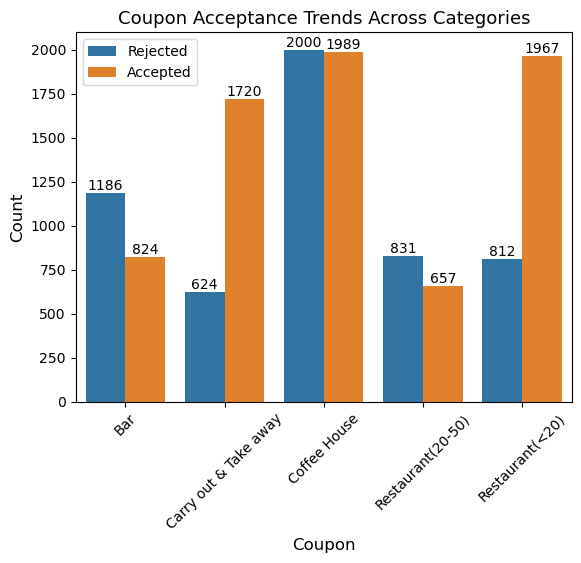

In [3648]:
ax = sns.barplot(data= coupon_data, x= 'coupon',y='count',hue='Y')
for i in ax.containers:
    ax.bar_label(i,)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Rejected', 'Accepted'])

plt.xticks(rotation=45)
plt.title('Coupon Acceptance Trends Across Categories', fontsize=13)
plt.xlabel('Coupon', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()


The bar plot reveals that, for all coupon categories, the rejection rate exceeds the acceptance rate. The only exceptions are coupons for cheaper restaurants (Restaurant<20) and Carry Out & Take Away coupons, which have higher acceptance rates than rejection rates. Let's dive deeper into this analysis.
<br><br>

## Investigating Restaurant(<20), Carry out & Take away Coupons

As mentioned, (Restaurant<20) and Carry Out & Take Away coupons are the only exeptions with higher acceptance rate. Thus, analyzing the reasons for this scenario.
**Note:** Since the name of the coupons are too long, at places they are mentioned just as 'Food Coupons'

In [3191]:
cheap_rest_carryout_coupons = data_cleaned['coupon'].isin(['Restaurant(<20)','Carry out & Take away'])

**1. Is Driving in the opposite direction to the destination affect the decision?**

In [3661]:
driving_in_opp_dir = data_cleaned['direction_opp']==1

In [3663]:
rest_carryout_driving_opp = (cheap_rest_carryout_coupons & driving_in_opp_dir )
cheap_rest_coupons = data_cleaned['coupon'].isin(['Restaurant(<20)'])
carryout_coupons = data_cleaned['coupon'].isin(['Carry out & Take away'])
rest_driving_opp = (rest_carryout_driving_opp & cheap_rest_coupons)
carryout_driving_opp = (rest_carryout_driving_opp & carryout_coupons)

Text(0.5, 1.0, 'Carry Out/Take Away Coupons')

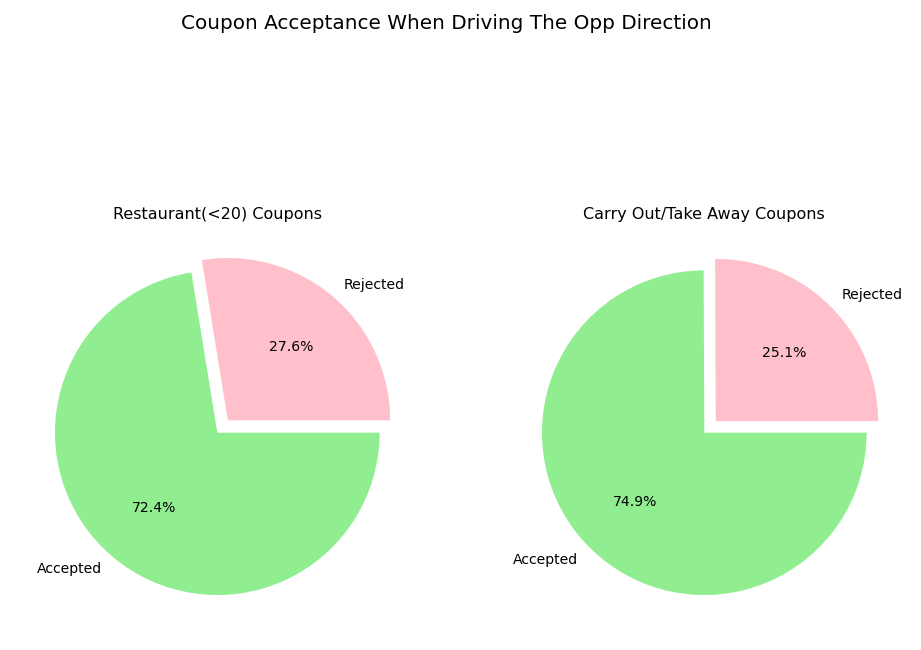

In [3665]:

fig = plt.figure(figsize=(8,6),dpi=144)
fig.suptitle('Coupon Acceptance When Driving The Opp Direction', fontsize=10)

ax1 = fig.add_subplot(121)
ax1.set_title('Restaurant(<20) Coupons', fontsize=8)
ax1.pie(data_cleaned[rest_driving_opp]['Y'].value_counts().sort_index(), autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'],textprops={'fontsize':7})
ax2 = fig.add_subplot(122)
ax2.pie(data_cleaned[carryout_driving_opp]['Y'].value_counts().sort_index(), autopct='%1.1f%%',labels= ['Rejected', 'Accepted'],explode = [0.1,0], colors=['pink','lightgreen'],textprops={'fontsize':7})
ax2.set_title('Carry Out/Take Away Coupons',fontsize=8)

The pie charts above compare the acceptance rates of Cheaper Restaurant coupons and Carry Out & Take Away coupons, even when the assigned location is in the opposite direction of the destination. Interestingly, the acceptance rates for both types exceed 70%, indicating a strong preference for these coupons over others.

Digging in deeper, we already know that people accept coupons the most when they travel alone. So lets analyse how the co-passenger affect the decision.


**2. Is accommpanying kids affect the decision any way?**

In [3675]:
riding_kids = data_cleaned['passanger'].isin([ 'Kid(s)'])
food_coupons_with_kids = (cheap_rest_carryout_coupons & riding_kids)

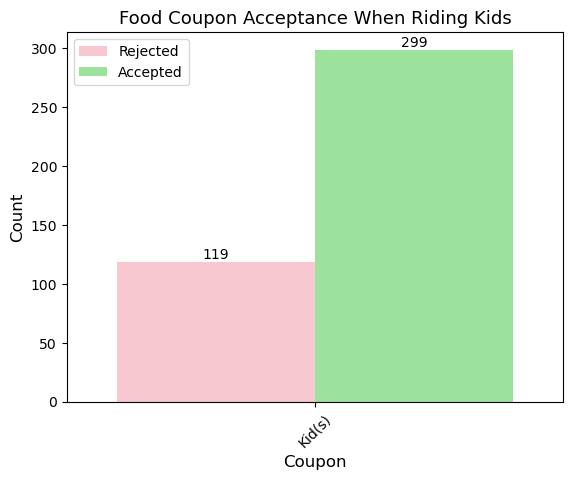

In [3681]:
ax = sns.countplot(data= data_cleaned[food_coupons_with_kids], x= 'passanger',hue='Y', palette=['pink','lightgreen'])
for i in ax.containers:
    ax.bar_label(i,)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Rejected', 'Accepted'])
plt.xticks(rotation=45)
plt.title('Food Coupon Acceptance When Riding Kids', fontsize=13)
plt.xlabel('Coupon', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.legend(loc='upper right', labels=['Coupon Redeemed', 'Coupon Expired'])
plt.show()

This shows even when people travel with kids, the acceptance rates to Cheaper restaurants and  Carry out/Take away coupons are higher. 

**3. Is the decision of people affected by their habit of not visiting Restaurant Less Than 20? Is the decision of people affected by their habit of not ordering pick up at restaurants?**

To analyse it further, lets see the decisions of people who are not frequent visitors of cheap restaurants and don't prefer to take out food from restaurants.

In [3688]:
not_freq_to_rest = data_cleaned['RestaurantLessThan20'].isin(['less1','never'])
not_freq_to_carryout = data_cleaned['CarryAway'].isin(['less1','never'])
not_freq_to_rest_carryout = (not_freq_to_rest & not_freq_to_carryout)
not_freq_to_rest_carryout_given_food_coupons = (not_freq_to_rest_carryout & cheap_rest_carryout_coupons)

In [3692]:
data_cleaned[not_freq_to_rest_carryout_given_food_coupons]['Y'].value_counts()

Y
1    200
0    101
Name: count, dtype: int64

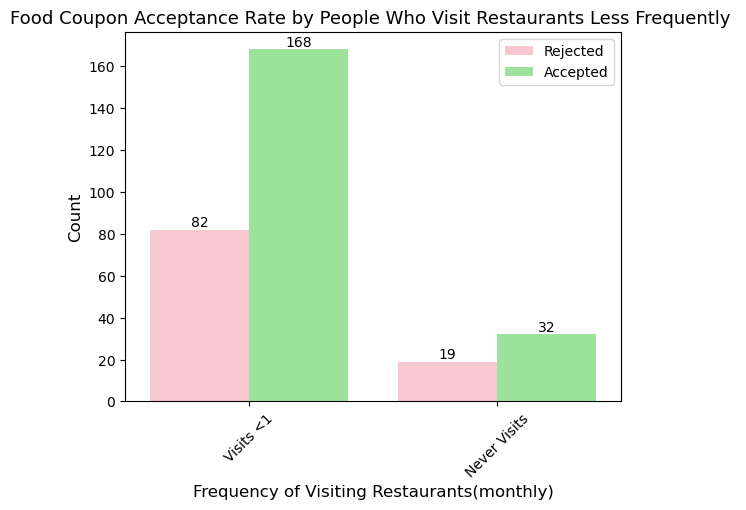

In [3706]:
ax = sns.countplot(data= data_cleaned[not_freq_to_rest_carryout_given_food_coupons], x= 'RestaurantLessThan20',hue='Y', palette=['pink','lightgreen'])
for i in ax.containers:
    ax.bar_label(i,)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Rejected', 'Accepted'])
ax.set_xticks(range(len(data_cleaned[not_freq_to_rest_carryout_given_food_coupons]['RestaurantLessThan20'].unique())))
ax.set_xticklabels(['Visits <1', 'Never Visits'])
plt.xticks(rotation=45)
plt.title('Food Coupon Acceptance Rate by People Who Visit Restaurants Less Frequently ', fontsize=13)
plt.xlabel('Frequency of Visiting Restaurants(monthly)', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.legend(loc='upper right', labels=['Coupon Redeemed', 'Coupon Expired'])
plt.show()

This chart clearly confirm that even people, who aren't frequent visitors of restaurants tend to redeem restaurants <20 and  Carry out/Take away coupons. 

**4. How is a detour of 25 min and a higher income affect their decision?**

In [3747]:
detour_25_min = data_cleaned['toCoupon_GEQ25min']==1

In [3749]:
income_over_50_k = ~data_cleaned['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])

In [3751]:
detour_more_than_25_min_more_income = (cheap_rest_carryout_coupons & detour_25_min & income_over_50_k)

In [3753]:
data_cleaned[detour_more_than_25_min_more_income]['Y'].value_counts().sort_values()

Y
0    128
1    109
Name: count, dtype: int64

In [3755]:
summary = pd.DataFrame(data_cleaned[detour_more_than_25_min_more_income].groupby('Y').size()).sort_index()
summary['status'] = ['Rejected', 'Accepted']
summary = summary.reset_index()
summary.rename(columns={0:'Count'},inplace=True)
summary

,Y,Count,status
0,0,128,Rejected
1,1,109,Accepted


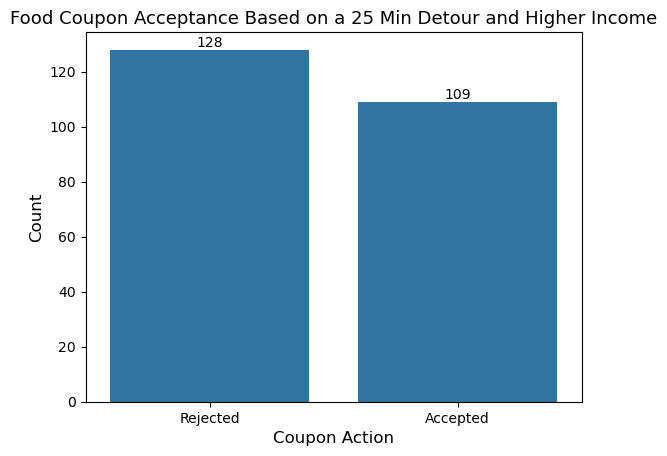

In [3757]:
ax=sns.barplot(data=summary, x='status',y='Count')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Food Coupon Acceptance Based on a 25 Min Detour and Higher Income', fontsize=13)
plt.xlabel('Coupon Action', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

This indicates that individuals who need to make a 25-minute detour and earn over 50k annually are more likely to reject food coupons.

## Conclusion & Key Insights

1. The destination significantly impacts people's decision to accept coupons.
2. Bar Coupons have a higher rejection rate compared to their acceptance rate, making them the least preferred category.
3. People traveling with kids have the lowest likelihood of accepting coupons.
4. Food Coupons, such as Restaurant < 20 and Carry Out & Take Away, are the most sought-after categories with high acceptance rates across various scenarios:
   * These coupons maintain strong appeal even when factors like traveling in the opposite direction, traveling with kids, or rarely visiting restaurants are present.
   * Despite their popularity, a detour of 25 minutes and a higher income level tend to discourage people from accepting these coupons.


**Note:** The key insights are elaborately discussed in the README.md file. 

## Next Steps & Recommendation
* **Model Development:** Build predictive models to forecast coupon acceptance based on the identified factors.
* **Further Analysis:** Explore additional features or external datasets that could enhance the understanding of driver behavior.
* **Deployment:** Develop an application or dashboard to allow real-time predictions and analyses of coupon acceptance.